# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)

%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Importing Dataset

In [2]:
# Laoding the data set
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations


In [3]:
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


<IPython.core.display.Javascript object>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

- This data set has 25480 rows and 12 columns
`case_id`,`continent`,`education_of_employee`,`has_job_experience`,`requires_job_training`,`region_of_employment`,`unit_of_wage` `full_time_position`,`case_status` are categorical variables

 `no_of_employees`,`yr_of_estab`,`prevailing_wage` are numerical variables
 
- The target variable is `case_status`

- Sanity checks

In [5]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [6]:
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* Dataset has no null values and no duplicate values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [8]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### Statistical Observations on Dataset
 - The dataset includes 25480 visa applications with 12 attributes to describe each application
 - The most applications are from continent Asia
 - Almost 40% of the applications have bachelor's degree
 - More than 50% of the applicants have prior job experience
 - There are negative values in the data set for number of employees, We can 
 - As conclusive from the data most jobs are in Northeast region
 - Prevailing wage column has min value of 2.1367, max value of 319210.27 with a mean value of 74455.82, this could be due to      the unit of the prevailing wage. It can be per hour or per annum
 - Target Variable is case status


In [9]:
# Let's see how many values are negative in no_of_employess
data.loc[data["no_of_employees"] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


<IPython.core.display.Javascript object>

In [10]:
data.loc[data["no_of_employees"] < 0].shape

(33, 12)

<IPython.core.display.Javascript object>

In [11]:
# copy the data set to have an origianl unchanged data set
data_1 = data.copy()

<IPython.core.display.Javascript object>

In [12]:
data_1.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [13]:
# Lets fix the negative values in the column to be absolute value
data_1["no_of_employees"] = abs(data_1["no_of_employees"])

<IPython.core.display.Javascript object>

In [14]:
data_1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.089207,22877.917453,11.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

- Before the min no of employees value was -26 which is fixed to be 11 

Let's see the unique categorical values in each variables

In [15]:
cat_col_list = list(data_1.select_dtypes("object").columns)

for column in cat_col_list:
    print(data_1[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

<IPython.core.display.Javascript object>

- Since Case Id column won't be affecting the data set we can drop that column

In [16]:
# dropping the case_id column
data_1.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

### Univariate Analysis

In [18]:
# function to create labeled barplots


def label_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()

<IPython.core.display.Javascript object>

In [19]:
# defining a function to print the histogram and bar plot to observe numerical variables


def hist_bar(data, feature, figsize=(15, 10), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="Red")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="Blue", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

#### Continents Observations

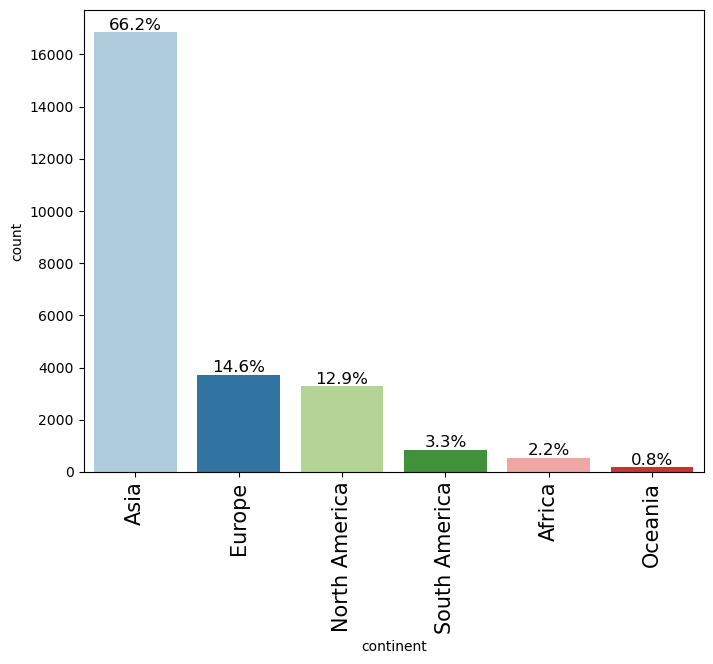

<IPython.core.display.Javascript object>

In [20]:
label_barplot(data_1, "continent", perc=True)

- As seen in the graph, highest number of applications are from Asia followed by Europe

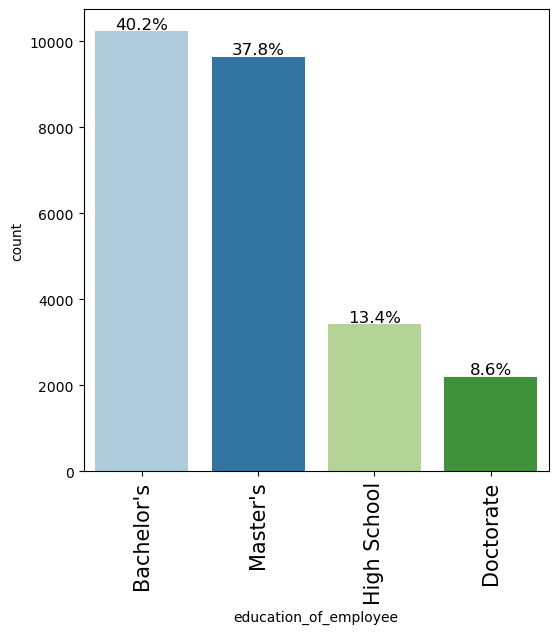

<IPython.core.display.Javascript object>

In [21]:
label_barplot(data_1, "education_of_employee", perc=True)

- 40% of applicants have bachelor's degree while almost 38% applicants have master's degree
- PhD candidates are the lowest in the data set

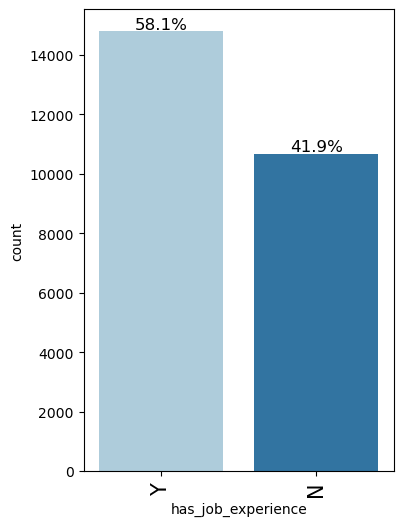

<IPython.core.display.Javascript object>

In [22]:
label_barplot(data_1, "has_job_experience", perc=True)

- More than 50% applicants have prior job experience

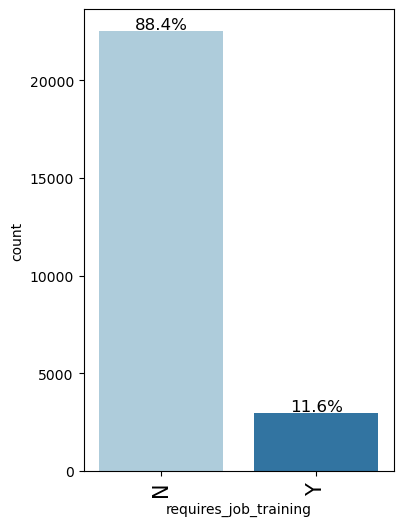

<IPython.core.display.Javascript object>

In [23]:
label_barplot(data_1, "requires_job_training", perc=True)

- Almost 88% of the applicants in the data set do not require job training

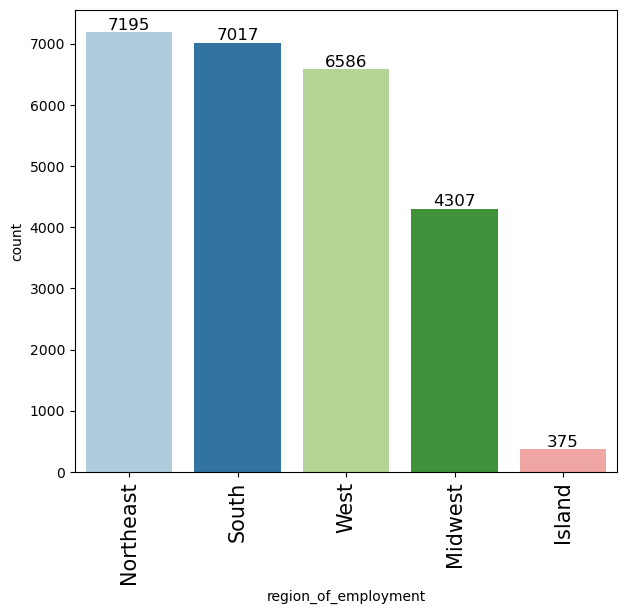

<IPython.core.display.Javascript object>

In [24]:
label_barplot(data_1, "region_of_employment")

- Northeast and south regions of united states lead in the employment category 

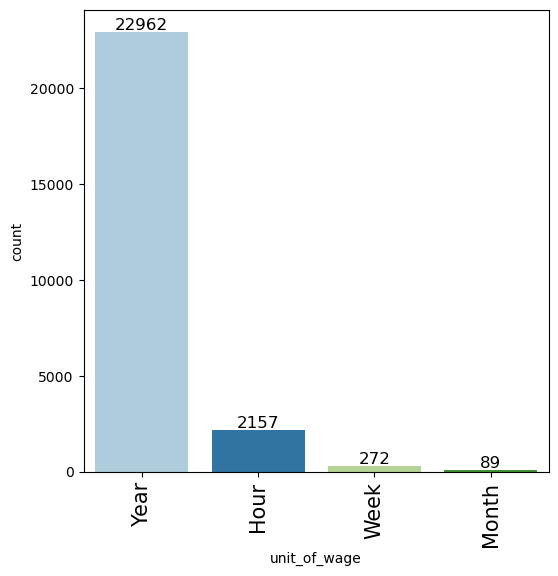

<IPython.core.display.Javascript object>

In [25]:
label_barplot(data_1, "unit_of_wage")

- Most of the applicants are paid annually

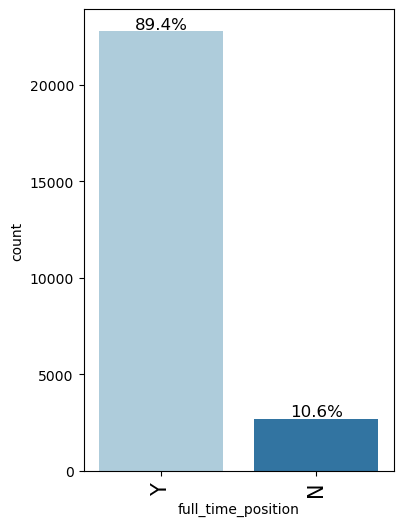

<IPython.core.display.Javascript object>

In [26]:
label_barplot(data_1, "full_time_position", perc=True)

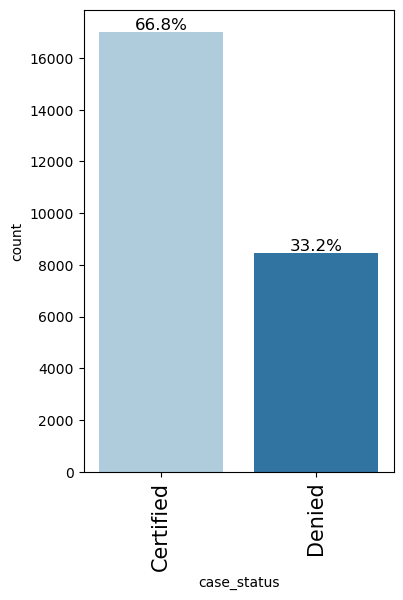

<IPython.core.display.Javascript object>

In [27]:
label_barplot(data_1, "case_status", perc=True)

- More than 65% of the applicants were granted the visa

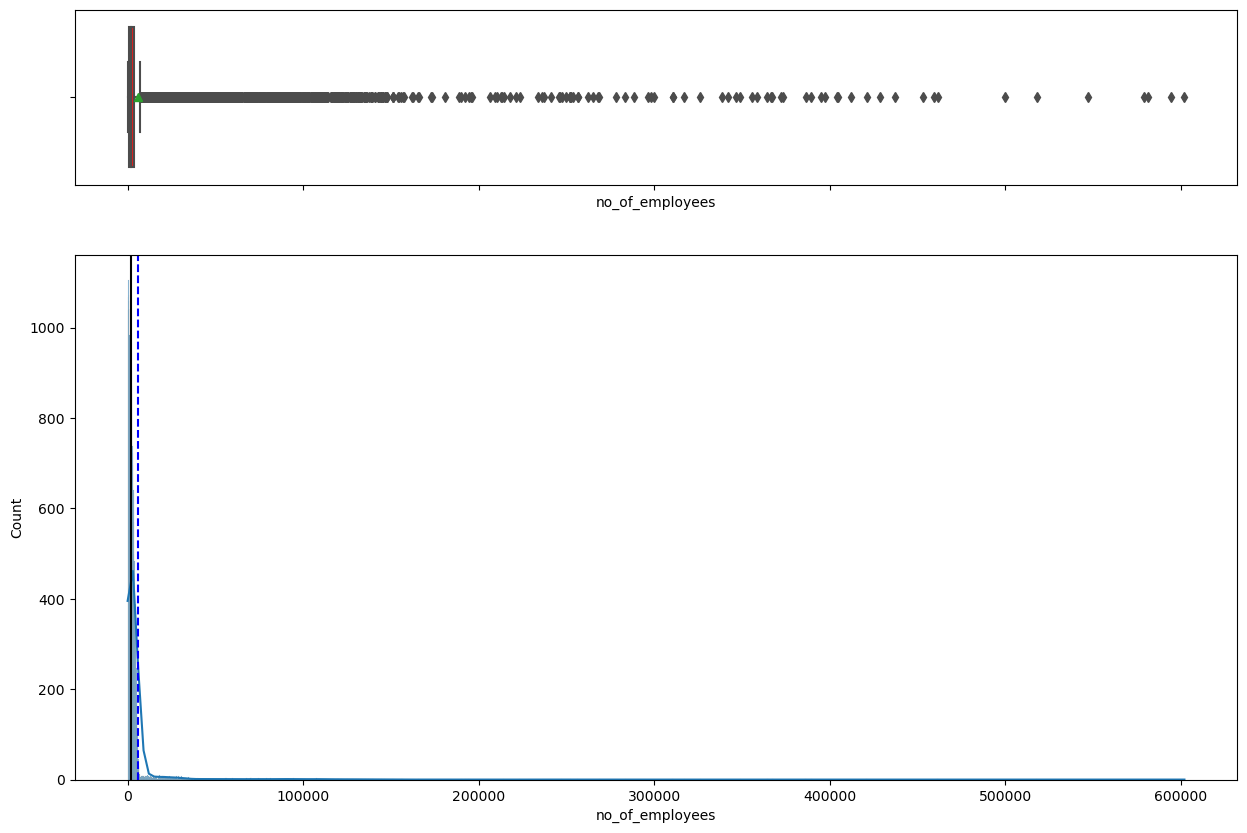

<IPython.core.display.Javascript object>

In [28]:
hist_bar(data_1, "no_of_employees")

- As clearly seen in the graph the distribution of no_of_employees has disparity in the data

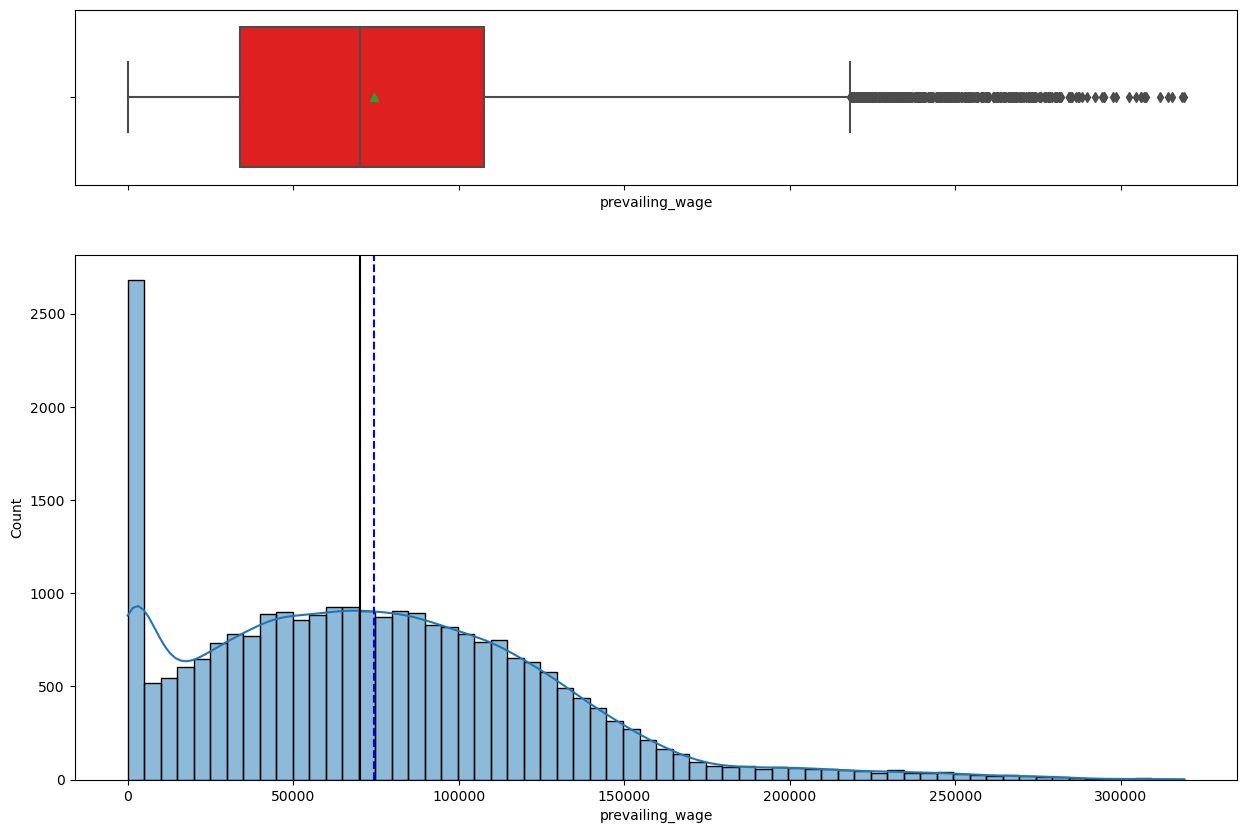

<IPython.core.display.Javascript object>

In [29]:
hist_bar(data_1, "prevailing_wage")

- The annual_wage is a right skewed distribution
- There are a lot of outliers in the data

In [30]:
# let's find out the number of prevailing wage less than 100
data_1.loc[data_1["prevailing_wage"] < 100, "unit_of_wage"].count()

176

<IPython.core.display.Javascript object>

- There are total of 176 rows with prevailing wage less than 100

### Bi-variate Analysis

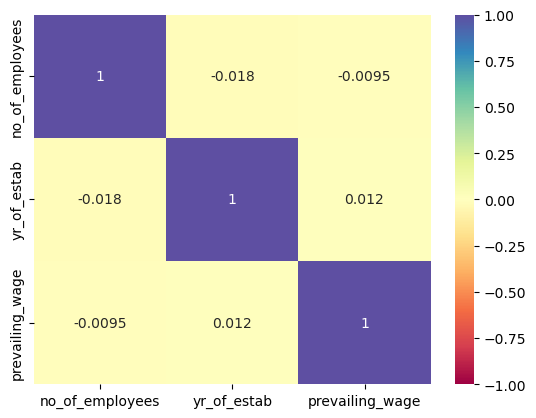

<IPython.core.display.Javascript object>

In [31]:
# Correlation of all the numerical variables
sns.heatmap(data_1.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- There is no correlations between the numerical variables

In [32]:
# lets define the function to plot distributions w r t target (case status)


def dist_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [33]:
# defining a function to see the distribution of numerical variable wrt to target variable(case_status)


def stack_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:

Q1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


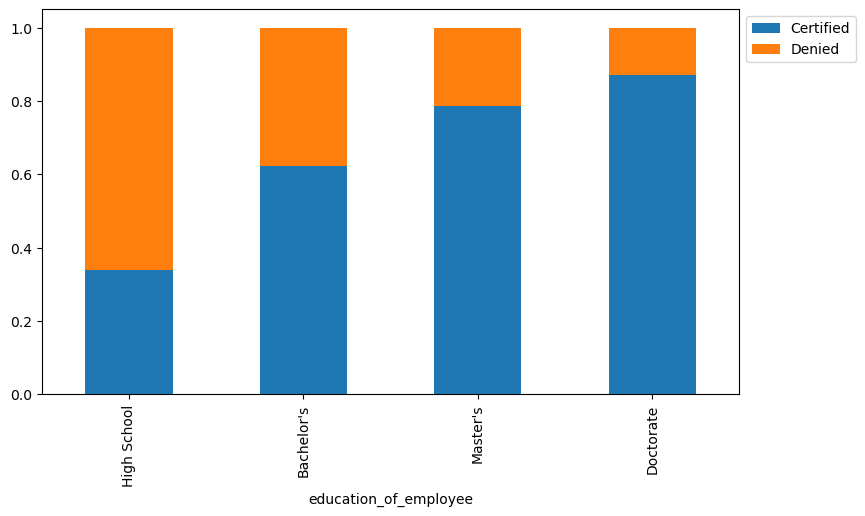

<IPython.core.display.Javascript object>

In [34]:
stack_barplot(data_1, "education_of_employee", "case_status")

Ans1:
- As see in the graph applicants with higher education like having a Master's Degree and a Doctorate Degree are more likely to get their visa granted. So, yes education does play a part in getting a visa

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


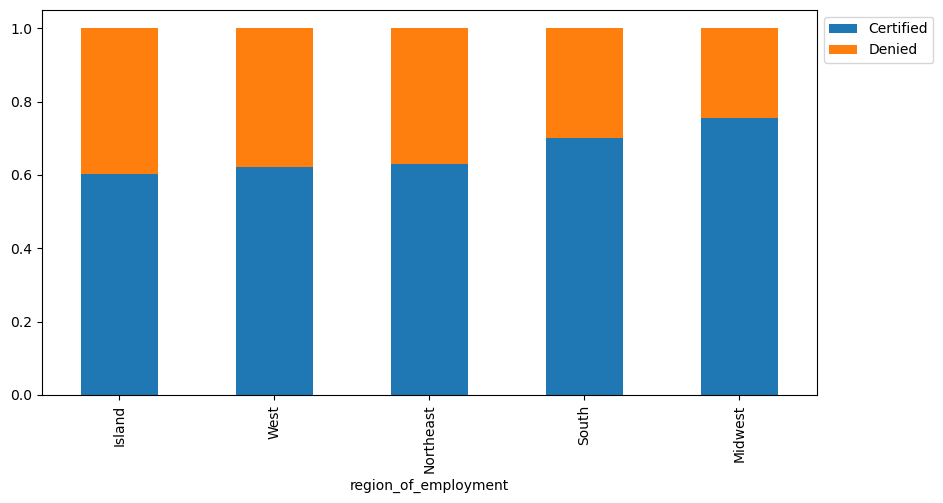

<IPython.core.display.Javascript object>

In [35]:
stack_barplot(data_1, "region_of_employment", "case_status")

Q2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


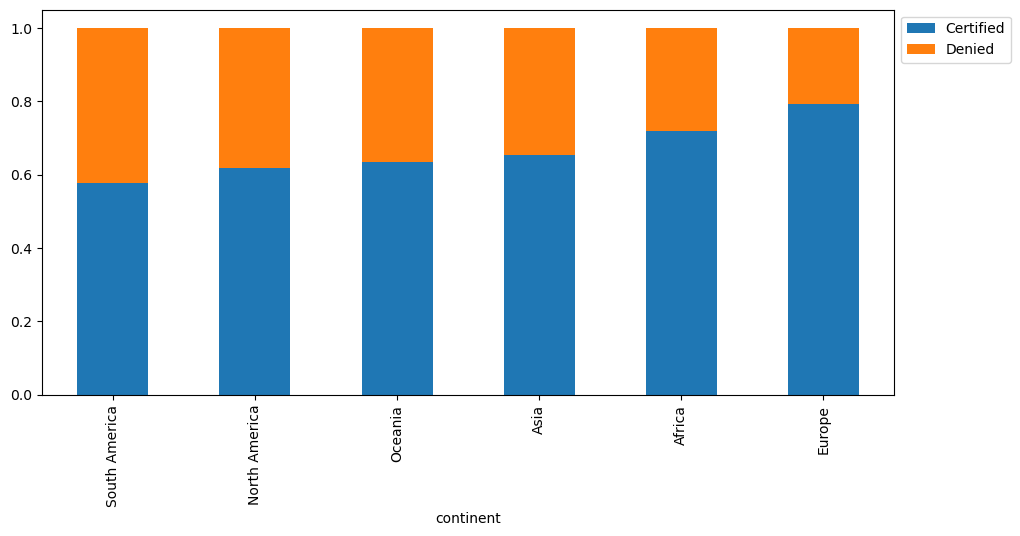

<IPython.core.display.Javascript object>

In [36]:
stack_barplot(data_1, "continent", "case_status")

Ans2:
- As observed in the bar plot Asia leads in both Visa Grants and Denial.
- Europian applicants have higher rate of visa approval.
- South America has higher visa denial than other continents

Q3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


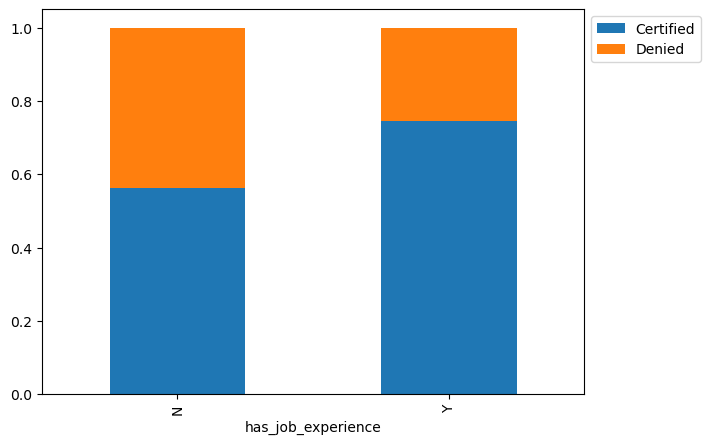

<IPython.core.display.Javascript object>

In [37]:
stack_barplot(data_1, "has_job_experience", "case_status")

Ans3: Yes, as seen from the graph applicants with prior job experiance are more likely to get the visa certified.

Q4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


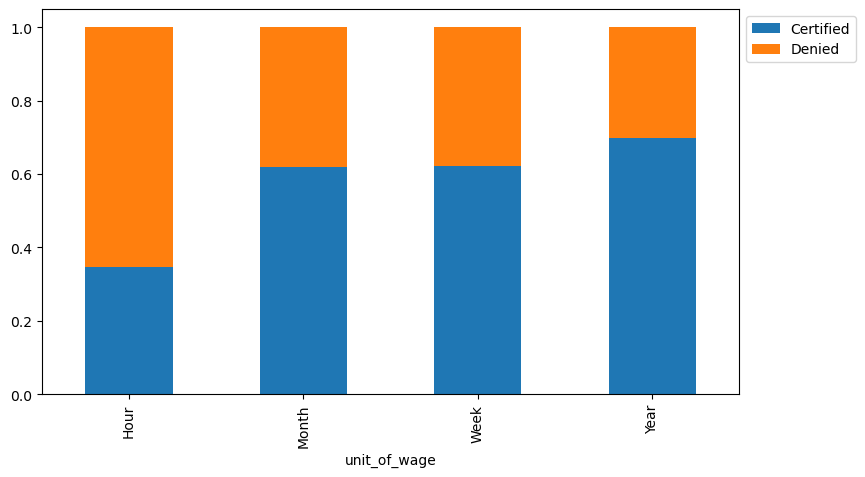

<IPython.core.display.Javascript object>

In [38]:
stack_barplot(data_1, "unit_of_wage", "case_status")

Ans4: Applicants, getting paid yealry are more likey to the visa certified.

Q5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

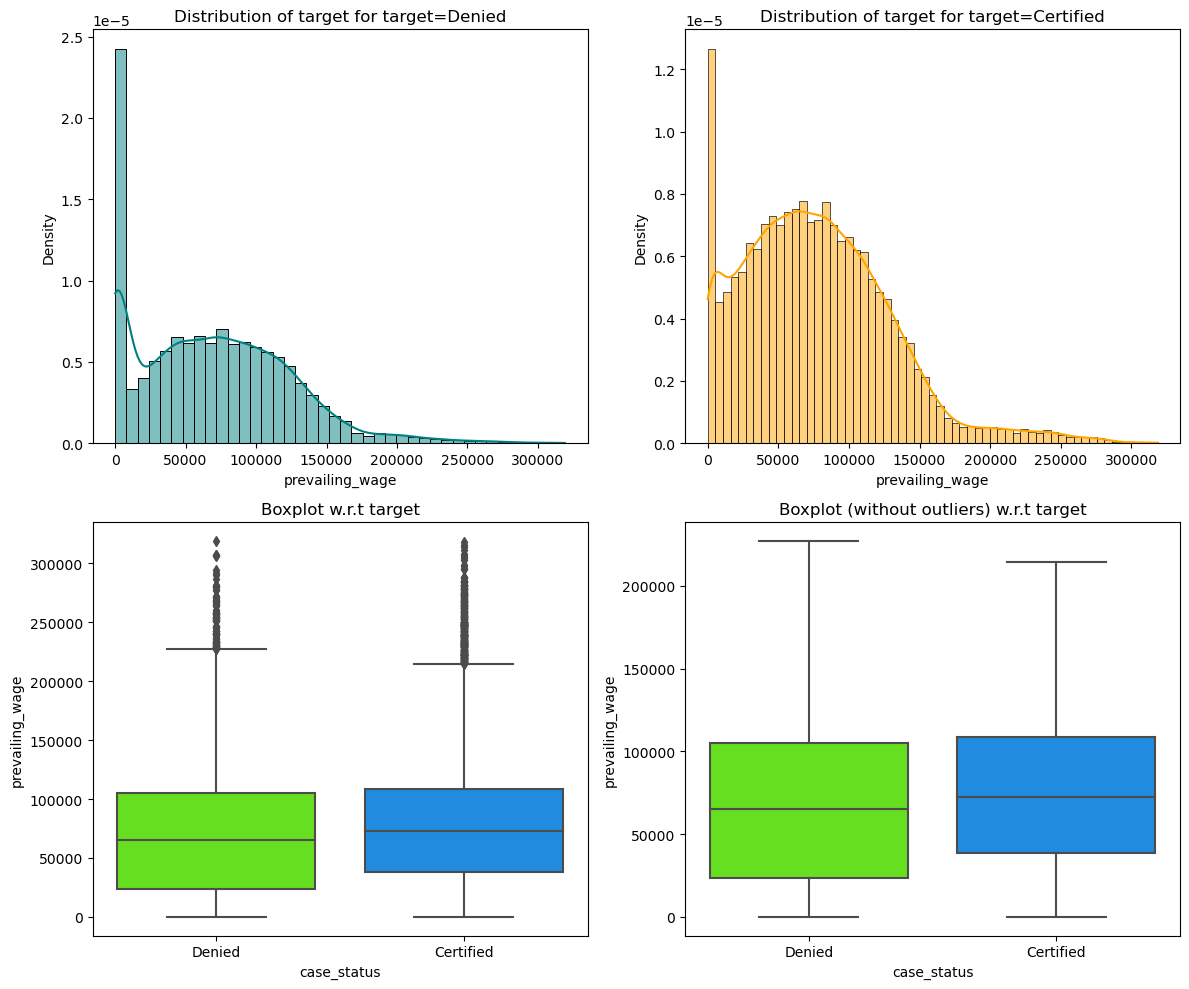

<IPython.core.display.Javascript object>

In [39]:
dist_plot_wrt_target(data_1, "prevailing_wage", "case_status")

Ans5: Applicants with the prevailing wage tend to get their visa approved

#### Checking the prevailing wage across the region

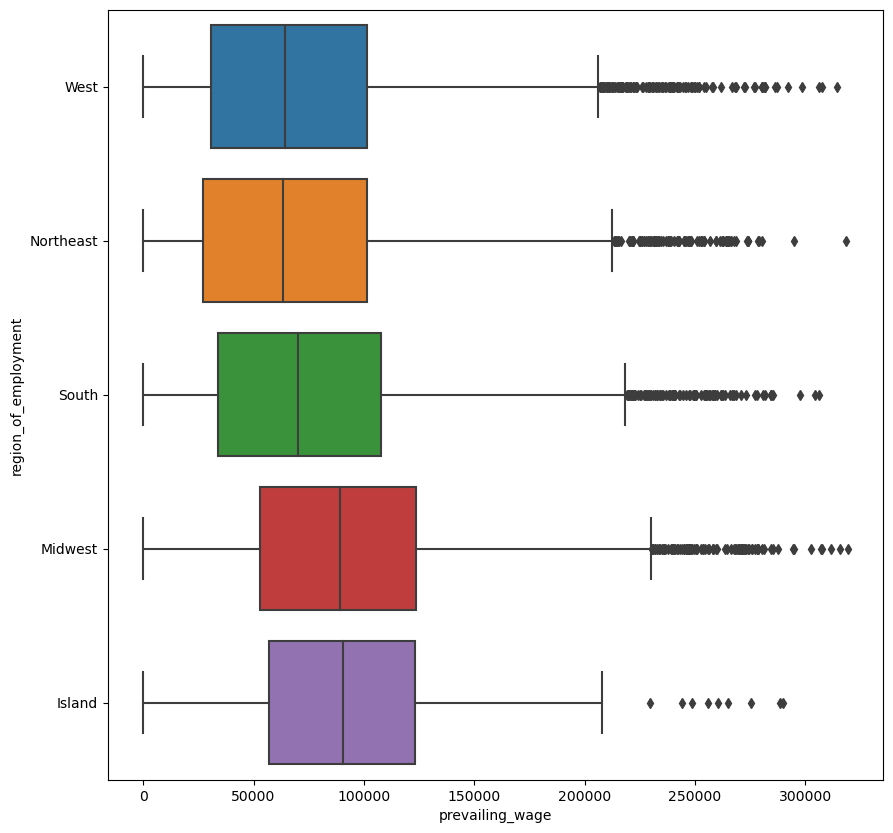

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="prevailing_wage", y="region_of_employment", data=data_1)
plt.show()

- The northeast and south regions where the populations are high, the prevailing wage is consistent

## Data Preprocessing

- Feature engineering
- Outlier detection and treatment
- Preparing data for modeling

### Checking the outliers in the numerical columns

In [41]:
def detect_outliers_boxplot(data, column):
    plt.figure(figsize=(8, 10))
    sns.boxplot(data=data[column])
    plt.xlabel(column)
    plt.title(f"Boxplot for {column}")

    plt.show()

<IPython.core.display.Javascript object>

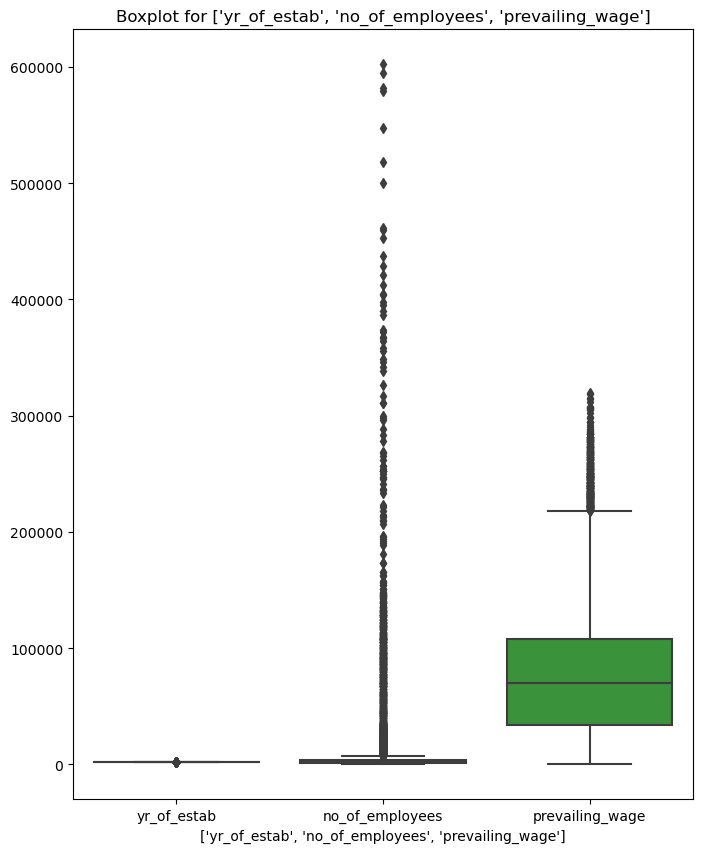

<IPython.core.display.Javascript object>

In [42]:
numerical_columns = ["yr_of_estab", "no_of_employees", "prevailing_wage"]

detect_outliers_boxplot(data_1, numerical_columns)

- There are a lot of outliers in the numerical variables but those are needed in the prediction model

### Preparing the data for modelling

In [43]:
data_1["case_status"] = data_1["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0
)
data_1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


<IPython.core.display.Javascript object>

In [44]:
# Drop the case status from the data and create the X and Y dataset for model fitting
X = data_1.drop(["case_status"], axis=1)
y = data_1["case_status"]

<IPython.core.display.Javascript object>

In [45]:
# creating the dummies for X
X = pd.get_dummies(X, drop_first=True)
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

In [46]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

In [47]:
# splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## Decision Tree -  Model Building and Hyperparameter Tuning

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get denied but in reality, the visa application should be approved.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

### Let's create function to calculate different matrics and confusion matrix
- model_performance_classification_sklearn will be used to check model performance
- confusion_matrix_sklearn will be used to plot confusion matrix

In [48]:
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [49]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree Classifier

In [50]:
# Decision Tree Classifier based on gini criteria and random state = 1
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.17, 1: 0.83}, random_state=1
)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

### Model Performance of training set

Decision Tree Training Performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


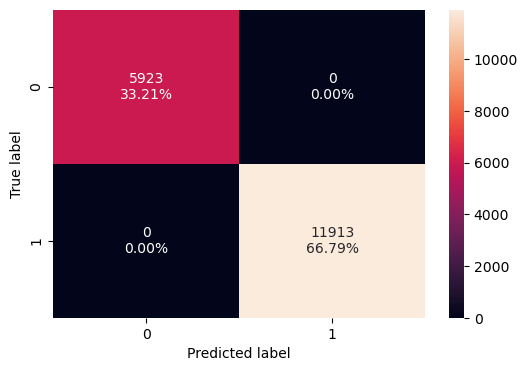

<IPython.core.display.Javascript object>

In [51]:
# Model performance on the train data
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Decision Tree Training Performance \n", dtree_model_train_perf)

# Confusion Matirx
confusion_matrix_sklearn(dtree, X_train, y_train)

- The accuracy of the decision tree is 1 which means the training data is overfitted

### Model Performance on Test Data

Decision Tree Testing Performance 
    Accuracy    Recall  Precision        F1
0  0.652538  0.728306   0.745538  0.736821


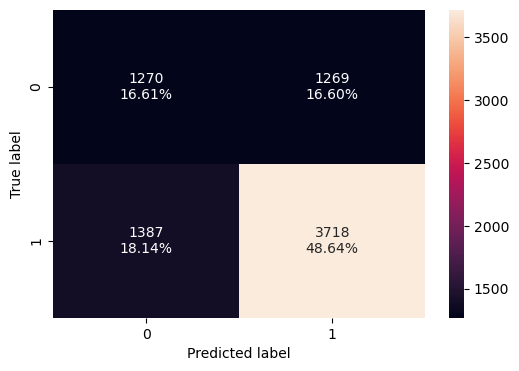

<IPython.core.display.Javascript object>

In [52]:
# perormance of the test data
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Decision Tree Testing Performance \n", dtree_model_test_perf)


# Confusion Matrix for test data
confusion_matrix_sklearn(dtree, X_test, y_test)

- The testing performance of the model is 65% accurate, with 75% precision and low F-1 score
- we have to apply hyperparameter tuning on the decision tree model.

### Hyperparmeter Decision Tree Tuning

In [53]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid search parameter
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}


scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

###  Tuned Model Performance on Training Data set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


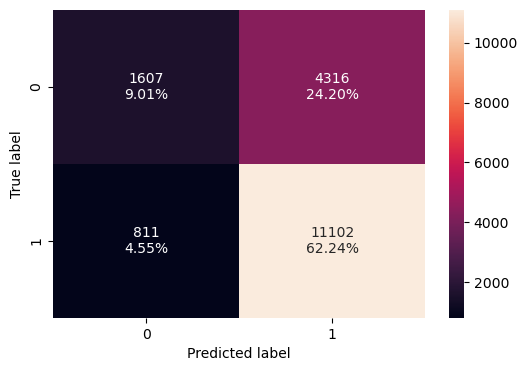

<IPython.core.display.Javascript object>

In [54]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

###  Tuned Model Performance on Testing Data set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


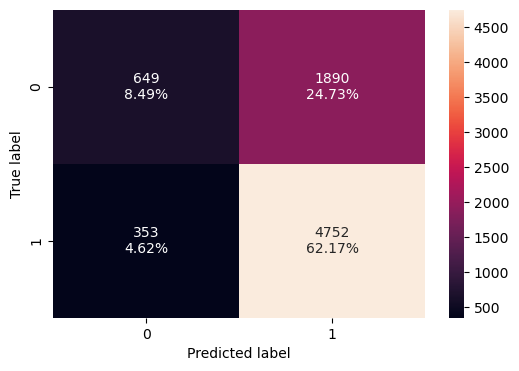

<IPython.core.display.Javascript object>

In [55]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

-  After applying the hyperparameters the model performance has been clearly improved in both Train and Test data det
-  The accuracy id same in both training and testing data, F-1 score has significantly improved

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [56]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

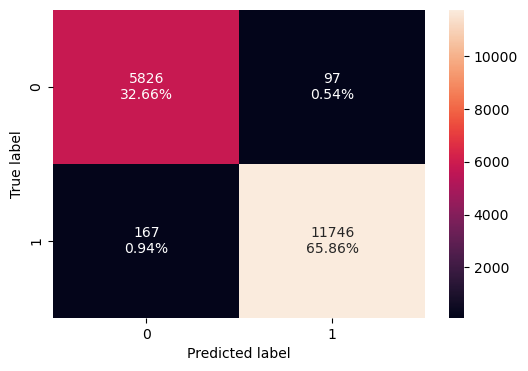

<IPython.core.display.Javascript object>

In [57]:
# Confusion Matrix
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

### Bagging Classifier Model Performance on Training Set

Training Performance:
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


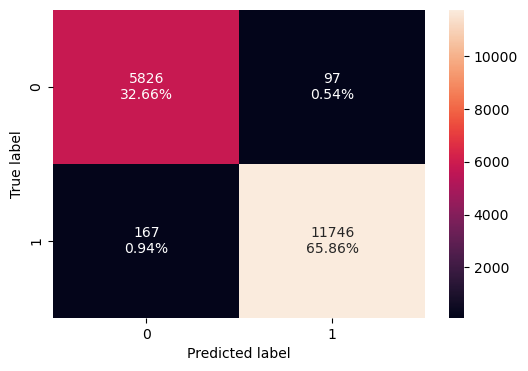

<IPython.core.display.Javascript object>

In [58]:
# bagging classifier model performance on the training set
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print(
    "Training Performance:\n",
    bagging_classifier_model_train_perf,
)

# confusion Matrix
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

- Using the bagging Classifier the training set has a really better performance with 98% F-1 score

### Bagging Classifier Model Performance on Testing Set

Testing Performance:
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


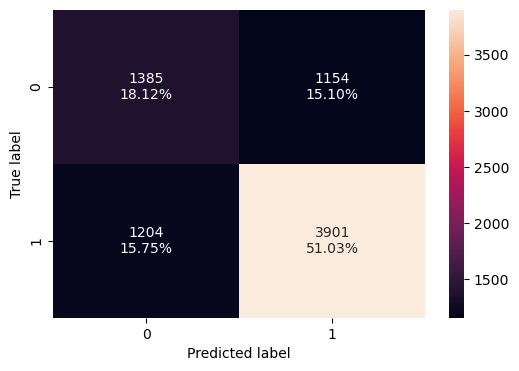

<IPython.core.display.Javascript object>

In [59]:
# bagging classifier model performance on the testing set
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print(
    "Testing Performance:\n",
    bagging_classifier_model_test_perf,
)

# confusion Matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

- Training data is overfitted by the bagging classifier
- F-1 score is 76% which is low on the test set
- Let's apply hyperparameter tuning 

### Bagging Classifier Model - Hyperparmeter Tuning

In [60]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# hyperparameters
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# F-1 score
scorer = metrics.make_scorer(metrics.f1_score)

# grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


bagging_estimator_tuned = grid_obj.best_estimator_


bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

### Tuned Model performance on Training Set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154


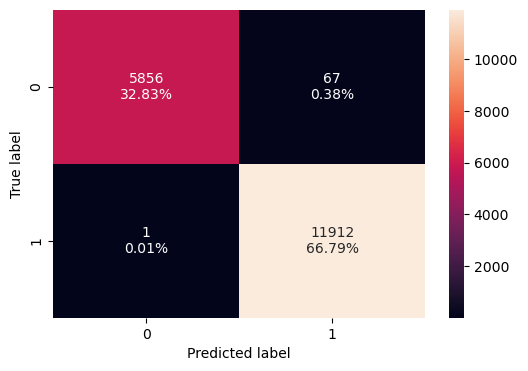

<IPython.core.display.Javascript object>

In [61]:
# bagging classifier tuned model performance on training set
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)


# Confusion Matrix on training
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)



### Tuned Model performance on Testing Set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


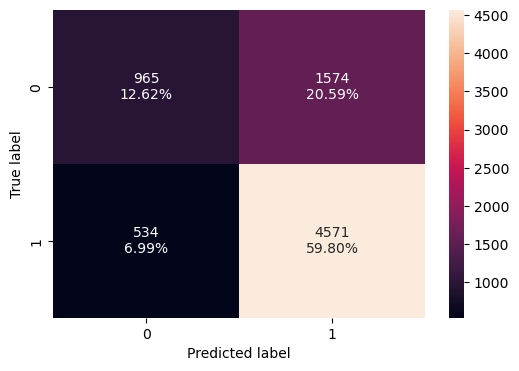

<IPython.core.display.Javascript object>

In [62]:
# bagging classifier tuned model performance on training set
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

- on the test set, F-1 score has been increased when we use the tuned bagging classifier model 
- Recall score has increased on the test set
- Accuracy is slightly increased

### Random Forest Classifier

In [63]:
# random forest classifier algorithm
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Random Forest Model Perforamance on the Training set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


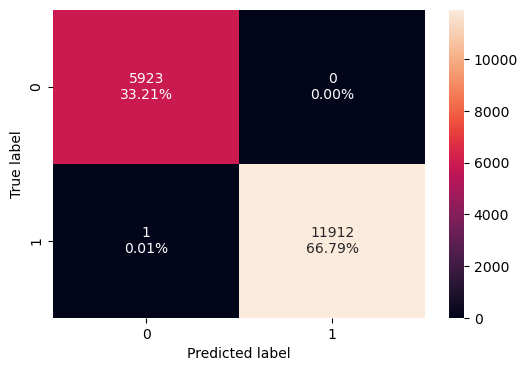

<IPython.core.display.Javascript object>

In [64]:
# Ranom forest model performance on training set
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

### Random Forest Model Perforamance on the Testing set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


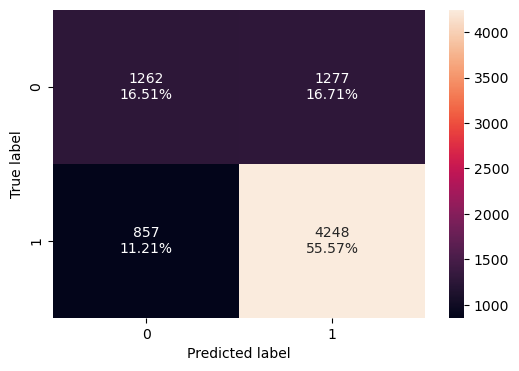

<IPython.core.display.Javascript object>

In [65]:
# Ranom forest model performance on testing set
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

-  Random forest model is slightly better than decision tree due to high f-1 score but the training set is still overfitted

### Hyperparameter Tuning Random Forest

In [66]:
# rf_tuned will be the tuned model
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}


acc_scorer = metrics.make_scorer(metrics.f1_score)

# grid search parameters
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


rf_tuned = grid_obj.best_estimator_


rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

### Tuned Model performance on the training set

Training performance:
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652


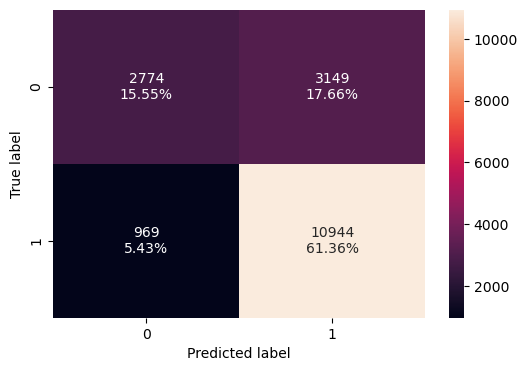

<IPython.core.display.Javascript object>

In [67]:
# Tuned Model performance on the training set
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

### Tuned Model performance on the testing set

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


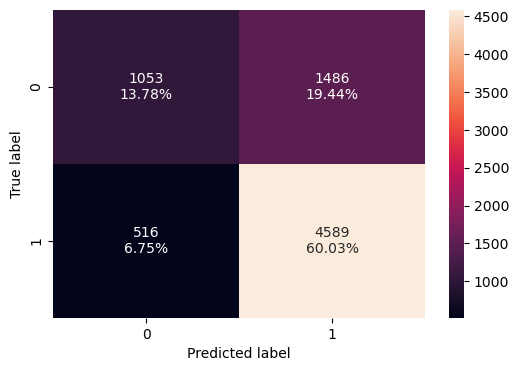

<IPython.core.display.Javascript object>

In [68]:
# Tuned Model performance on the testing set
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

- The overfitting has been reduced significantly in the training data
- The F-1 score in the test set has also improved

## Boosting - Building Models and Hyperparameter Tuning

### AdaBoost Classifier

In [69]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

### AdaBoost Classifier Model performance on the training set

Training performance:
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


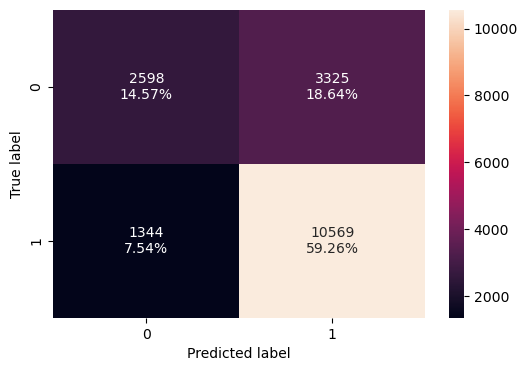

<IPython.core.display.Javascript object>

In [70]:
# performance on the training data set
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)

print("Training performance:\n", ab_classifier_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

### AdaBoost Classifier Model performance on the testing set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


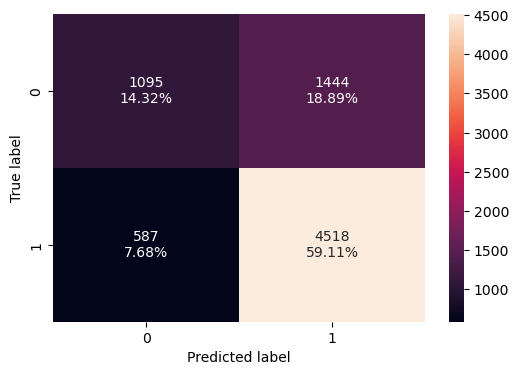

<IPython.core.display.Javascript object>

In [71]:
# performance on the testing data set
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)

print("Testing performance:\n", ab_classifier_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

-  AdaBoost is giving more standardized model but with low F1 score

### AdaBoost Classifier Hyperparameter Tuning

In [72]:
# Tuned AdaBoost Parameter
ab_tuned = AdaBoostClassifier(random_state=1)

# grid arameters
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

# grid search parameters
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


ab_tuned = grid_obj.best_estimator_


ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

### Tuned AdaBoost Classifier Model performance on the training set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


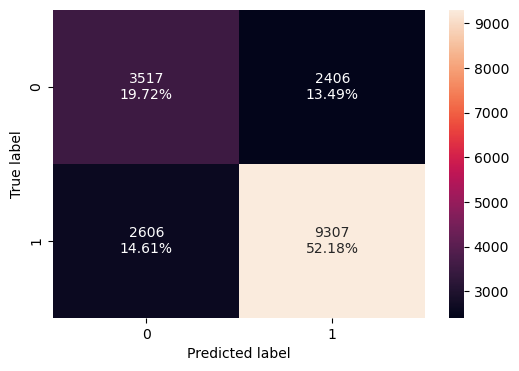

<IPython.core.display.Javascript object>

In [73]:
# performance on the training data set
ab_tuned_model_train_perf = model_performance_classification_sklearn(
    ab_tuned, X_train, y_train
)

print("Training performance:\n", ab_tuned_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(ab_tuned, X_train, y_train)

### Tuned AdaBoost Classifier Model performance on the testing set

Testing performance:
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


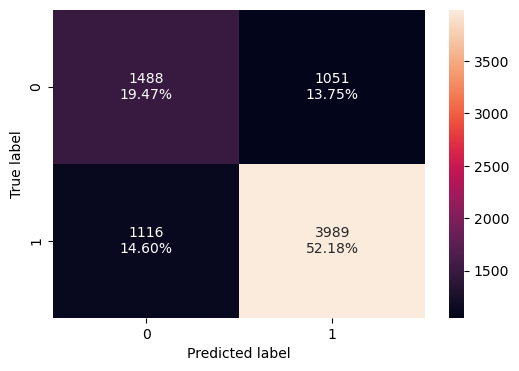

<IPython.core.display.Javascript object>

In [74]:
# performance on the testing data set
ab_tuned_model_test_perf = model_performance_classification_sklearn(
    ab_tuned, X_test, y_test
)

print("Testing performance:\n", ab_tuned_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(ab_tuned, X_test, y_test)

-  The tuned AdaBoost Model is actually decreasing the Accuracy,Recall and F1 score. But, the precision is improved

### Gradient Boosting Classifier

In [75]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Gradient Boosting Classifier Performance on Training Set

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


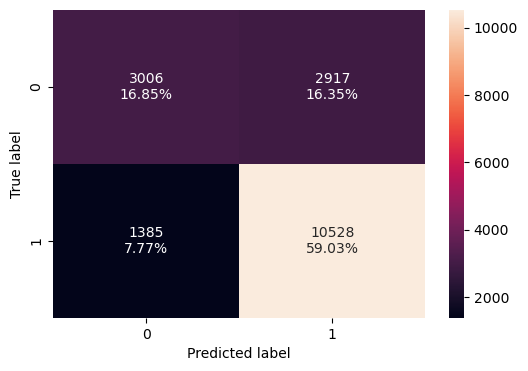

<IPython.core.display.Javascript object>

In [76]:
# performance on the training data set
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)

print("Training performance:\n", gb_classifier_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

### Gradient Boosting Classifier Performance on Testing Set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


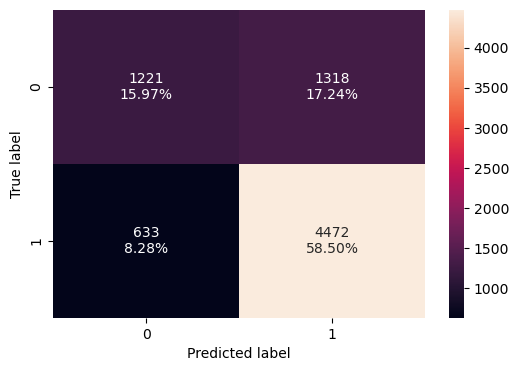

<IPython.core.display.Javascript object>

In [77]:
# performance on the testing data set
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)

print("Testing performance:\n", gb_classifier_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

- The Model performance on the testing has decreased F1 score than training

### Hyperparameter tuning Gradient Boosting Classifier

In [78]:
# type of classifier.
gb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}


acc_scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

### Tuned Gradient Boosting model on Training Set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234


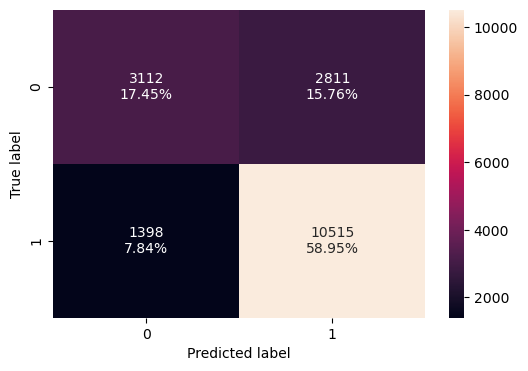

<IPython.core.display.Javascript object>

In [79]:
# performance on the training data set
gb_tuned_model_train_perf = model_performance_classification_sklearn(
    gb_tuned, X_train, y_train
)

print("Training performance:\n", gb_tuned_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(gb_tuned, X_train, y_train)

### Tuned Gradient Boosting model on Testing Set

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


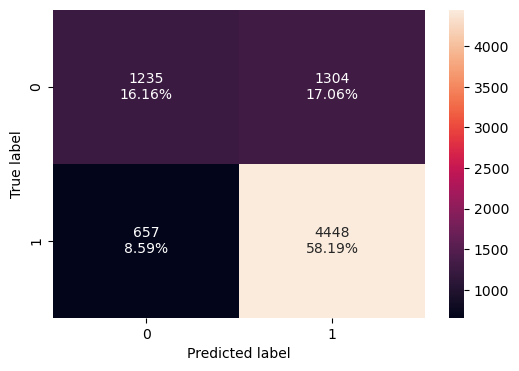

<IPython.core.display.Javascript object>

In [80]:
# performance on the testing data set
gb_tuned_model_test_perf = model_performance_classification_sklearn(
    gb_tuned, X_test, y_test
)

print("Testing performance:\n", gb_tuned_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

### XGBoost Classifier

In [81]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

### XGBoost Model Performance on Training Data

Training performance:
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394


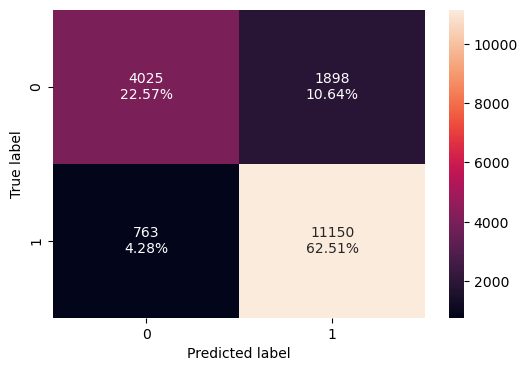

<IPython.core.display.Javascript object>

In [82]:
# performance on the training data set
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)

print("Training performance:\n", xgb_classifier_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

### XGBoost Model Performance on Testing Data

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143


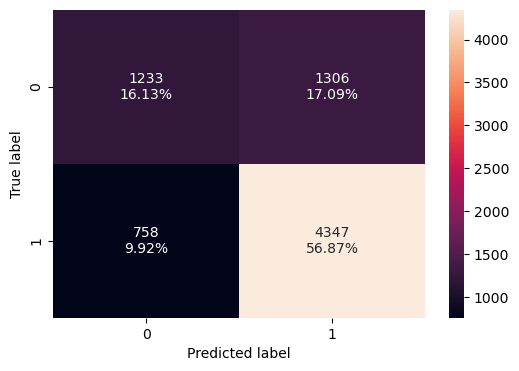

<IPython.core.display.Javascript object>

In [83]:
# performance on the testing data set
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)

print("Testing performance:\n", xgb_classifier_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

- The F1 score is decreased on the testing data 

### Tuned XGBoost Classifier

In [84]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# grid Parameters
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

# Gridsearch parameter
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

### Tuned XGBoost Model Performance on Training Data

Training performance:
    Accuracy    Recall  Precision        F1
0  0.760092  0.879879   0.786347  0.830488


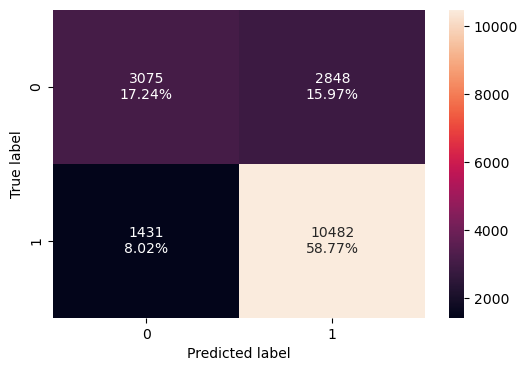

<IPython.core.display.Javascript object>

In [85]:
# performance on the training data set
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)

print("Training performance:\n", xgb_tuned_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

### Tuned XGBoost Model Performance on Testing Data

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.744636  0.868364    0.77595  0.81956


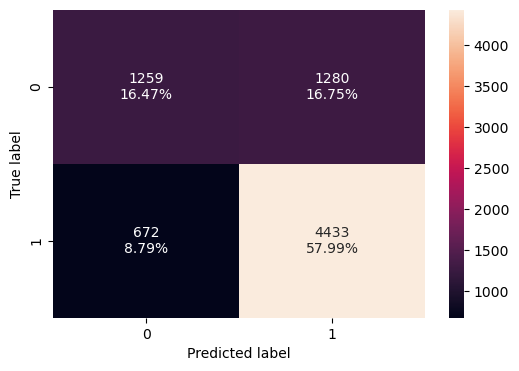

<IPython.core.display.Javascript object>

In [86]:
# performance on the testing data set
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)

print("Testing performance:\n", xgb_tuned_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

### Stacking Classifier Model

In [87]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gb_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=Tru...
                                                 

<IPython.core.display.Javascript object>

### Stacking Classifier Model performance on the Training Data

Training performance:
    Accuracy    Recall  Precision        F1
0  0.769904  0.887686   0.792669  0.837491


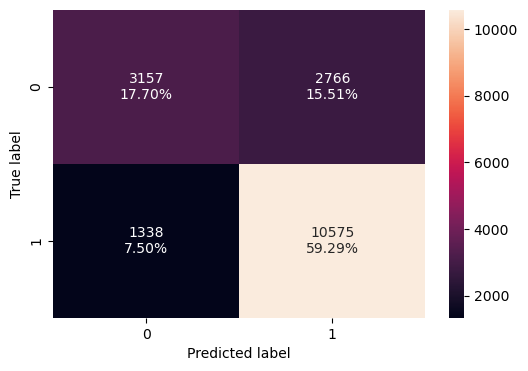

<IPython.core.display.Javascript object>

In [88]:
# performance on the training data set
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)

print("Training performance:\n", stacking_classifier_model_train_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

### Stacking Classifier Model performance on the Testing Data

Testring performance:
    Accuracy    Recall  Precision        F1
0   0.74529  0.874633   0.773562  0.820998


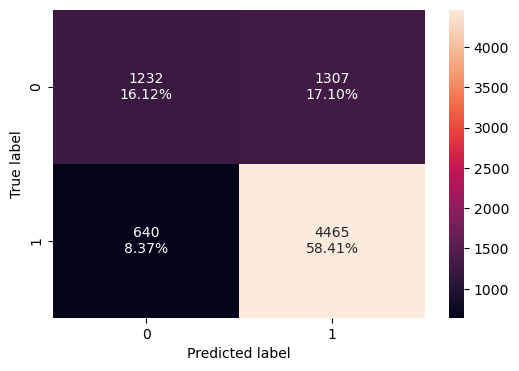

<IPython.core.display.Javascript object>

In [89]:
# performance on the testing data set
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)

print("Testring performance:\n", stacking_classifier_model_test_perf)


# Confusion Matrix on testing
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

- The stacking model classifier gives a similar performance to XGBoost

## Model Performance Comparison and Final Model Selection

### Model Performance comparison on training data

In [90]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758802,0.764017,0.850807,0.760092,0.769904
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.883740,0.882649,0.935952,0.879879,0.887686
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.783042,0.789059,0.854537,0.786347,0.792669
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.830349,0.833234,0.893394,0.830488,0.837491


<IPython.core.display.Javascript object>

### Model Performance comparison on testing data

In [91]:
# model comparison on test dataa
models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        ab_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652538,0.706567,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.744767,0.743459,0.729984,0.744636,0.745290
Recall,0.728306,0.930852,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.876004,0.871303,0.851518,0.868364,0.874633
Precision,0.745538,0.715447,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.772366,0.773296,0.768972,0.775950,0.773562
F1,0.736821,0.809058,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.820927,0.819379,0.808143,0.819560,0.820998


<IPython.core.display.Javascript object>

-  The stacking classifier is the best model with the highest F1 score and gives more generalized performance on both training and testing data

### Importance of features

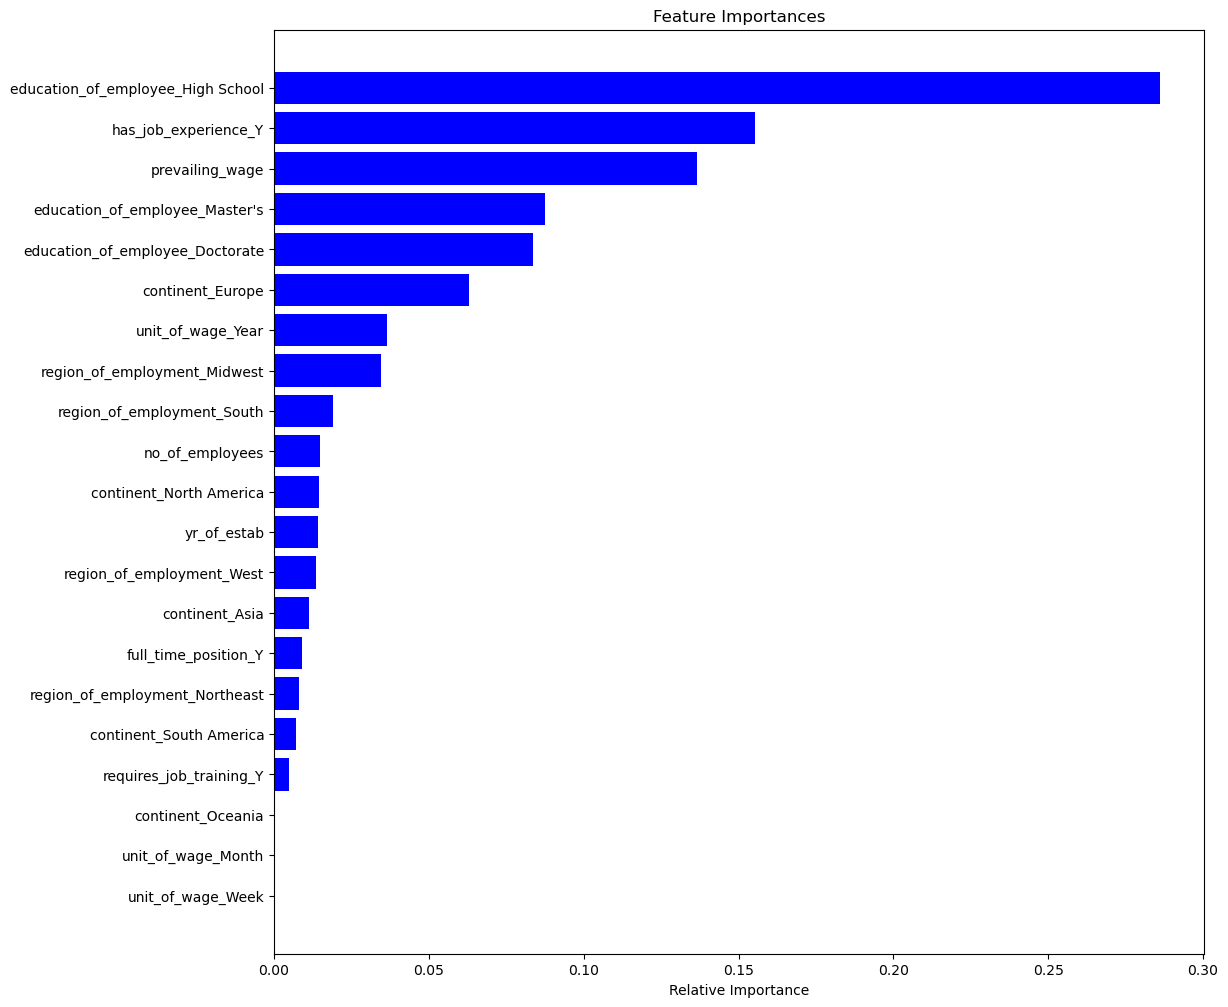

<IPython.core.display.Javascript object>

In [92]:
feature_X = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_X[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Education of the employee is the best parameter in granting the visa, while prior job experience and prevailing wage are moderately affecting the model predictability

## Actionable Insights and Recommendations

### Insights
- The predictive model that we have established using stacking classifier is giving the best performance and prediction power to get a sense of the visa approval based on features
- Most important criteria for an applicant is to have higher education to get a good chance of visa approval, prior job experince and prevailing wage  are also important categories to get visa approved
- Applicants with High school as the highest level of education tend to get their visa denied.
- Also having a post graduate degree a best parameters to have for an applicant

### Recommendations
- As a person who is also part of the same visa system, I would recommend provide more information on the type of company and the title of employee which would greatly affect the visa approval rate
- EasyVisa should partner with the hiring companies to provide programs to get the most qualified applicants.
- EasyVisa needs to provide consultation to prospective applicants based on the predictive model to educate them regarding most important features to have while applying for a visa
- Due to covid,American work culture has changed completely.There should be more information on the job type like (in-person,remote or hybrid)
- Adding more to the new work culture a criteria about technological proficiency in popular software of communication in work place(such as MS Teams, Google Zoom,WebEx) should be added to qualify the applicant to get certified as a way to adopt to these new challanges